# Caso Práctico 1: Aprendizaje Supervisado Clasificación

## Librerías

In [3]:
%matplotlib inline

#Módulos de manipulación de datos
import pandas as pd
import numpy as np

#Módulos de scikit-learn de machine learning
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

#Módulos de evaluación de modelos
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay

#Librerías de visualización
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [8]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')

Cargamos los siguientes datasets de datos, que contienen tres variables, dos relativas a valores y una variable `y`que contiene la clase. Esta clase es binaria y valdrá cero o uno.

Guardamos los dataframes en una lista para poder trabajar con ellos dentro de bucles y reducir las líneas de código.

In [14]:
datasets = [df1, df2, df3]
datasets_names = ['df1', 'df2', 'df3']

Vamos a representar los datos gráficamente para poder visualizar la distribución de las clases

In [17]:
f, axes = plt.subplots(1, 3, figsize=(16,4))

for ax, df,name in zip(axes, datasets,datasets_names):
    ax.scatter(df['X1'], df['X2'], c=df['y'], edgecolors='k')
    ax.set_title('Dataset '+ name)

## Train Test split

Separa cada conjunto de datos en un conjunto de entrenamiento y de test utilizando el método `train_test_split`de scikit-learn. En esta primera ocasión se proporciona el código. En este caso asignamos el 20% a test y el 80% restante a train. Recordemos que la mayor cantidad de datos debe ir al conjunto de entrenamiento.

In [20]:
datasets_train = []
datasets_test = []

for df in datasets:
    df_train, df_test = train_test_split(df,test_size=0.2,
                                         stratify=df['y'], 
                                         random_state=1993)   
    datasets_train.append(df_train)
    datasets_test.append(df_test)

Basándote en el código dado anteriormente, utilizando un bucle, grafica para cada conjunto original de datos, su conjunto de train y de test, en gráficos diferentes.

# Modelos de Machine Learning

A continuación ejecuta diferentes modelos de los vistos en esta unidad y compara su rendimiento en cada caso.

Todos los algoritmos implementados en scikit-learn están expuestos en su API mediante objetos de tipo *Estimator*, que garantiza que todos los modelos disponen de la misma API:

- `Estimator.fit(X, y)`: ajusta los parámetros del modelo a los datos
- `Estimator.predict(X)`: predicce los valores de salida para datos nuevos
- `Estimator.score(X, y)`: evalúa los resultados de la predicción

## Logistic Regression

### Entrenamiento y Predicción

En este apartado debes entrenar el modelo y realizar la predicción. En esta primera ocasión se proporciona el código. 
En primer lugar inicializamos el objeto de la regresión logística.

In [27]:
lr = LogisticRegression()



Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos: 

In [30]:
lr.fit(df_train[['X1', 'X2']], df_train['y'])

LogisticRegression()



Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos:

In [33]:
prediction = lr.predict(df_test[['X1', 'X2']])

Utilizando el código anterior, ejecuta dentro de un bucle el entrenamiento y la predicción para cada dataset de datos. Grafica la frontera de decisión del modelo en cada caso para ver las predicciones que realiza con el método `plot_decision_regions`también de scikit-learn.

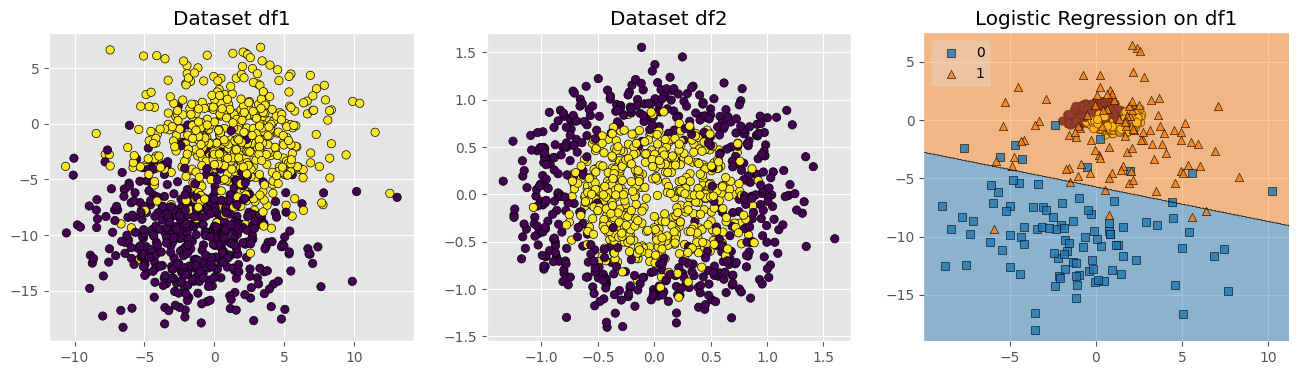

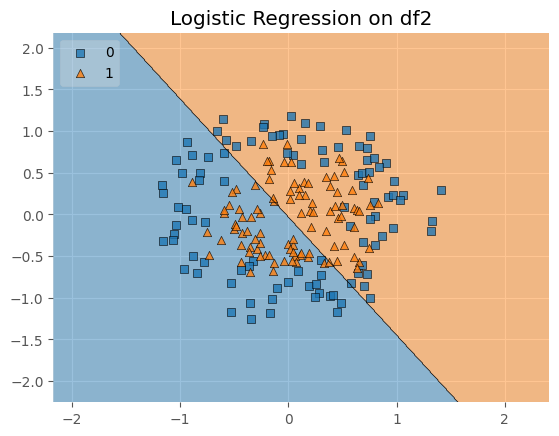

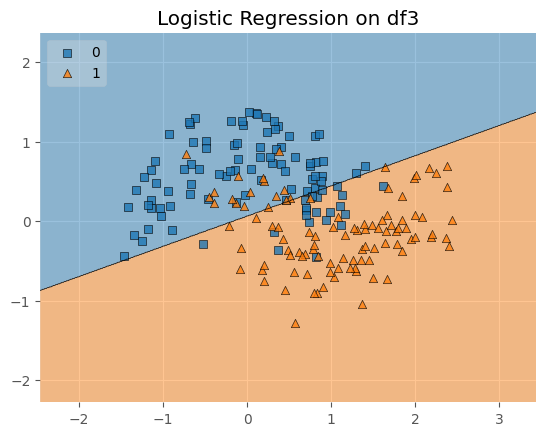

In [36]:
logistic_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    lr = LogisticRegression() 
    lr.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = lr, legend=2)
    plt.title('Logistic Regression on '+names)
    plt.show()
    
    logistic_regs.append(lr)

### Evaluación

Debemos evaluar el rendimiento de nuestro modelo como siguiente paso. Se proporciona el código para la evaluación del modelo sobre cada conjunto de datos.

Analiza las métricas. ¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.915
Precision: 0.895
Recall:    0.94
Fscore:    0.917




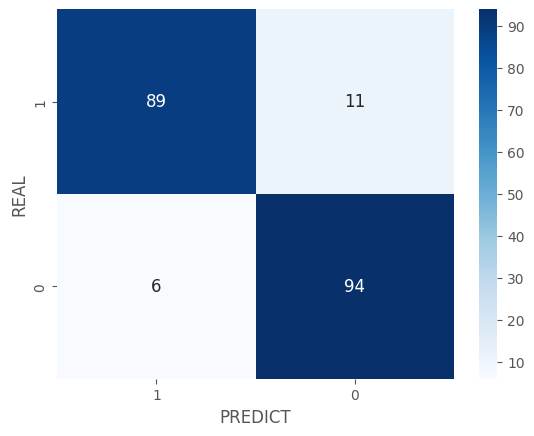

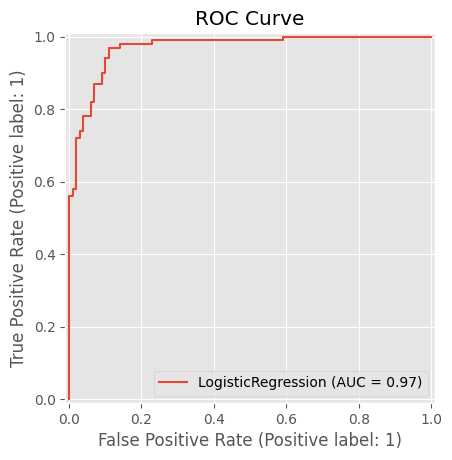

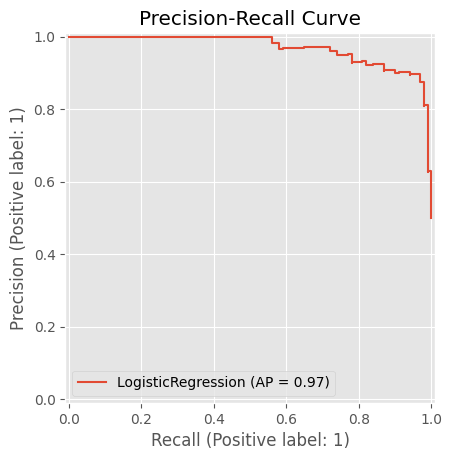

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.48
Precision: 0.481
Recall:    0.51
Fscore:    0.495




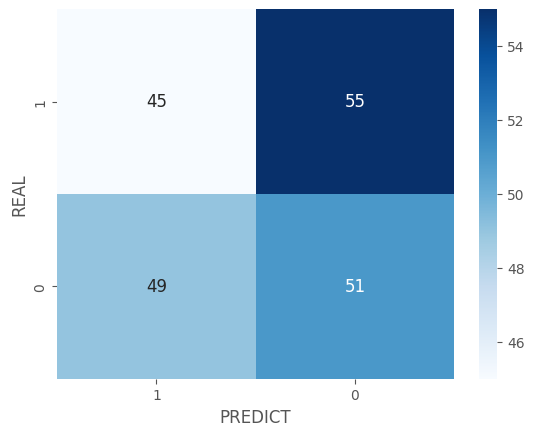

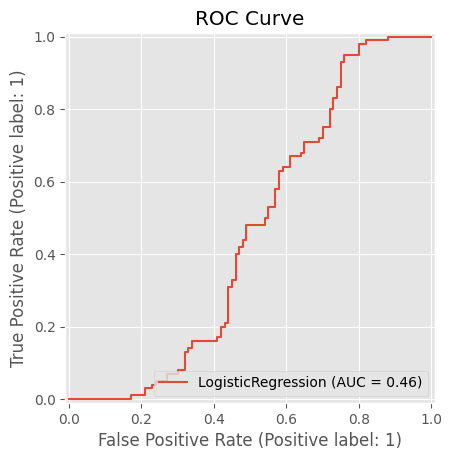

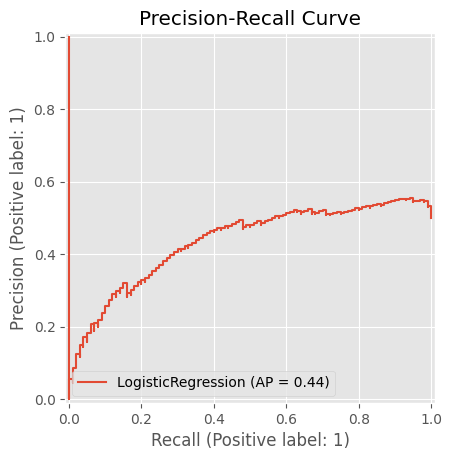

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.81
Precision: 0.798
Recall:    0.83
Fscore:    0.814




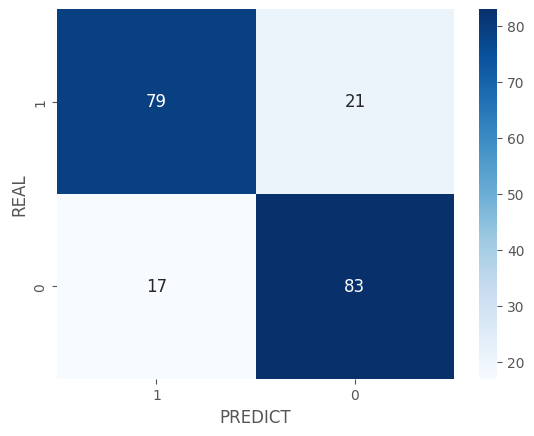

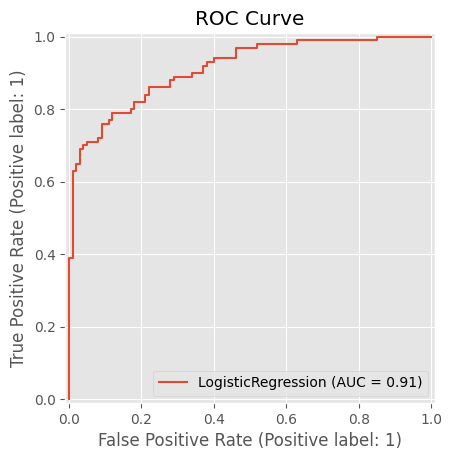

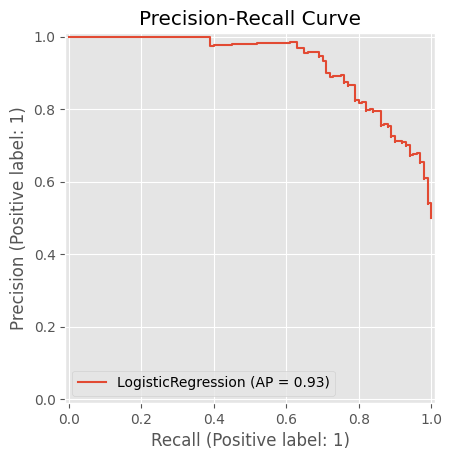

In [39]:
for lr, df_test,names in zip(logistic_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Classification Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_lr'] = lr.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_lr'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_lr']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_lr']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_lr']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_lr']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(lr, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(lr, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

## KNN

A continuación realiza el mismo procedimiento que hicimos con la Regresión Logística para analizar el algoritmo KNN.

### Entrenamiento y predicción

Inicializa el objeto kNN, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [164]:
knn = KNeighborsClassifier() 

In [166]:
knn.fit(df_train[['X1', 'X2']], df_train['y'])

KNeighborsClassifier()

In [168]:
prediction = knn.predict(df_test[['X1', 'X2']])

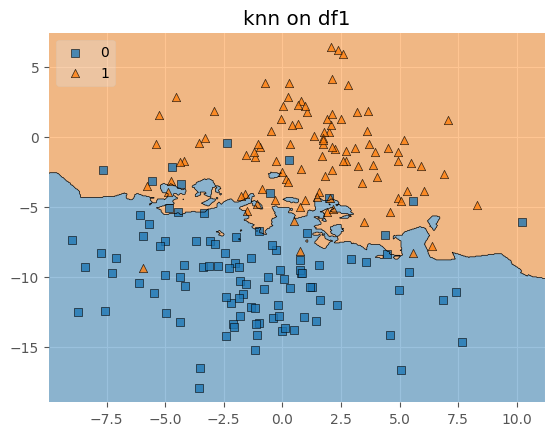

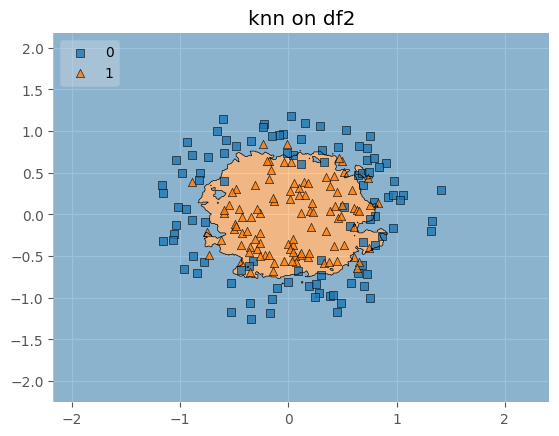

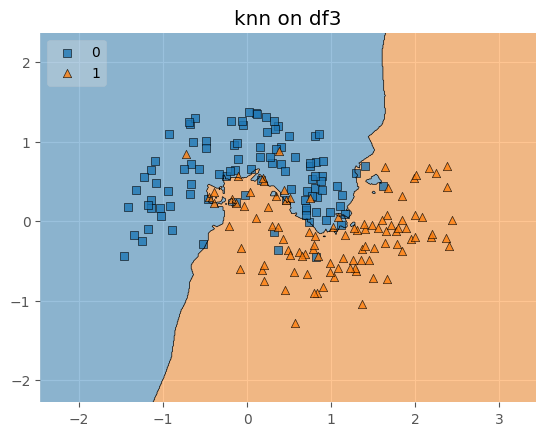

In [170]:
knn_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    knn = KNeighborsClassifier() 
    knn.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = knn, legend=2)
    plt.title('knn on '+names)
    plt.show()
    
    knn_regs.append(knn)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.905
Precision: 0.879
Recall:    0.94
Fscore:    0.908




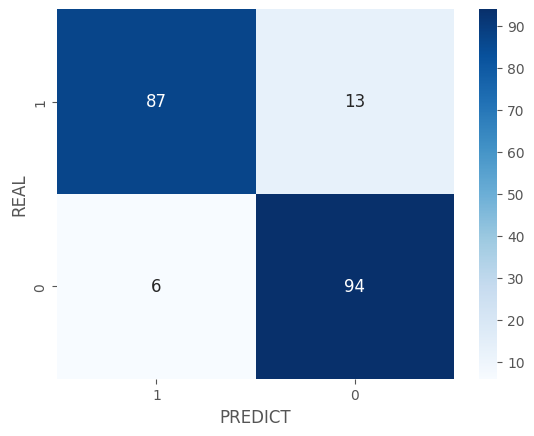

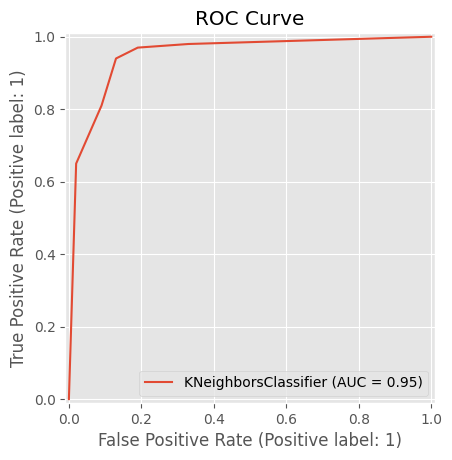

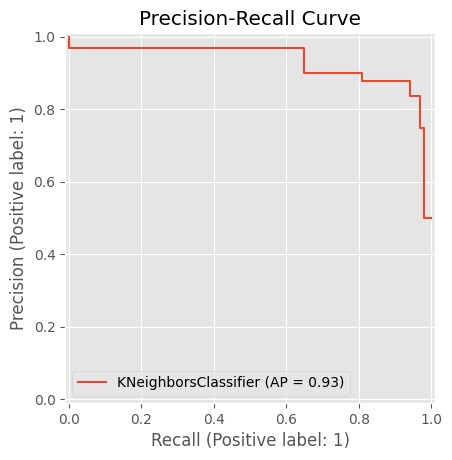

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.87
Precision: 0.863
Recall:    0.88
Fscore:    0.871




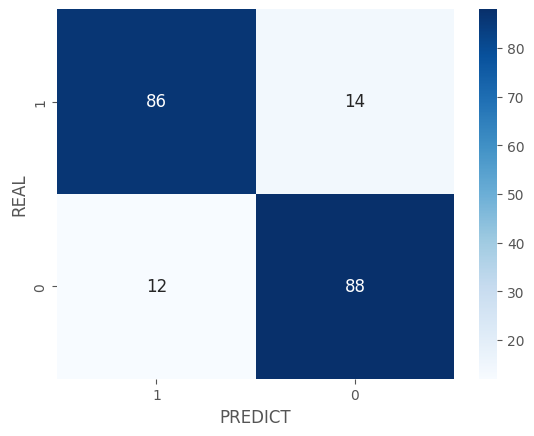

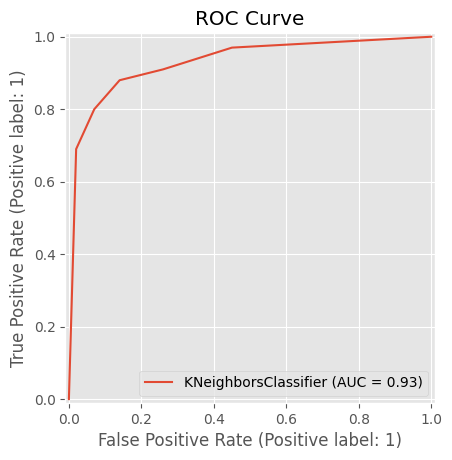

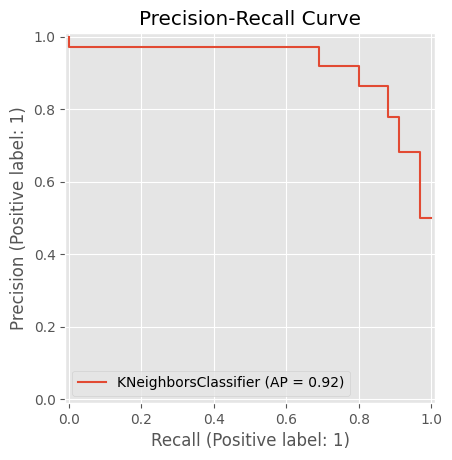

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.905
Precision: 0.909
Recall:    0.9
Fscore:    0.905




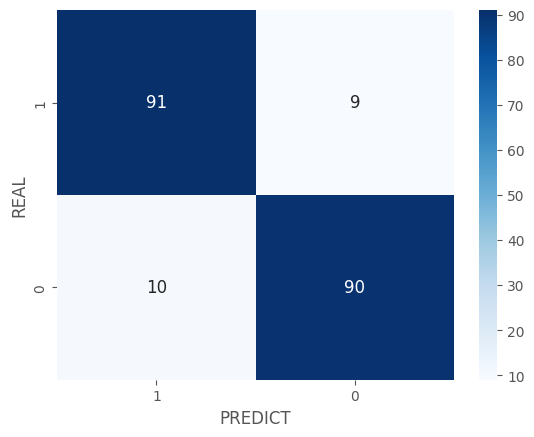

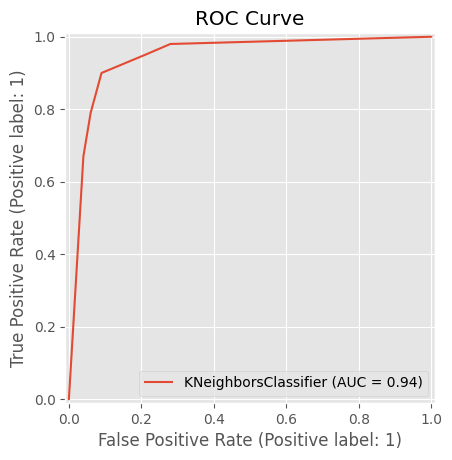

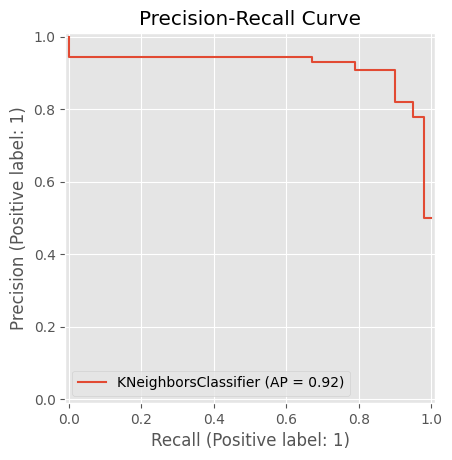

In [172]:
for knn, df_test,names in zip(knn_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Classification Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_knn'] = knn.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_knn'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_knn']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_knn']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_knn']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_knn']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(knn, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(knn, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

## SVM

A continuación vamos a relizar el mismo procedimiento con el algoritmo SVM, en primer lugar con un Kernel lineal y luego con un Kernel radial.

### Kernel lineal
#### Entrenamiento y predicción

Utilizando un kernel lineal inicializa el objeto SVC (SVM para clasificación), entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [174]:
lsvc = LinearSVC()

In [176]:
lsvc.fit(df_train[['X1', 'X2']], df_train['y'])

LinearSVC()

In [178]:
prediction = lsvc.predict(df_test[['X1', 'X2']])

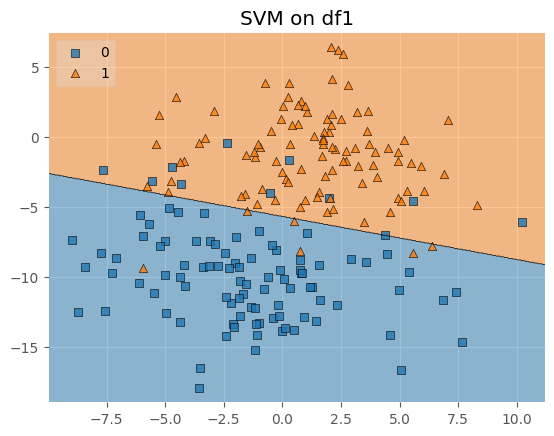

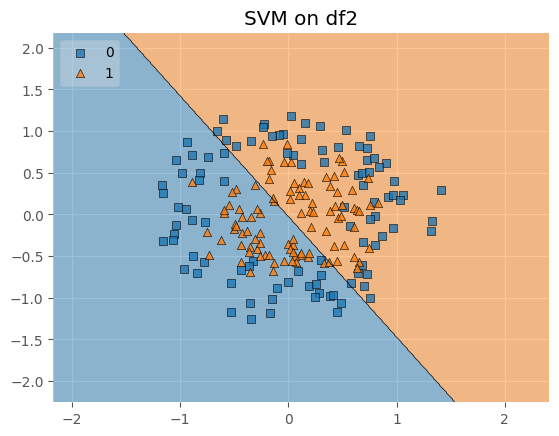

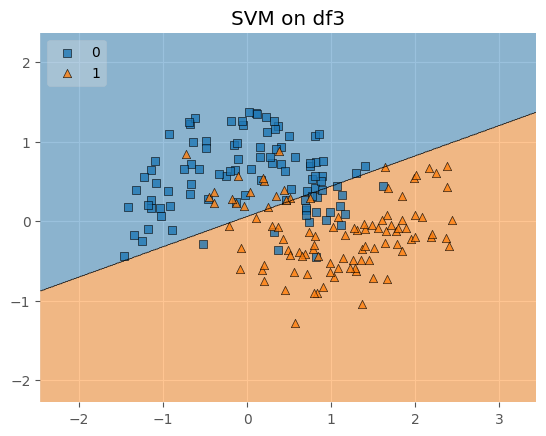

In [180]:
LinearSVC_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    lsvc = LinearSVC() 
    lsvc.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = lsvc, legend=2)
    plt.title('SVM on '+names)
    plt.show()
    
    LinearSVC_regs.append(lsvc)

#### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.915
Precision: 0.895
Recall:    0.94
Fscore:    0.917




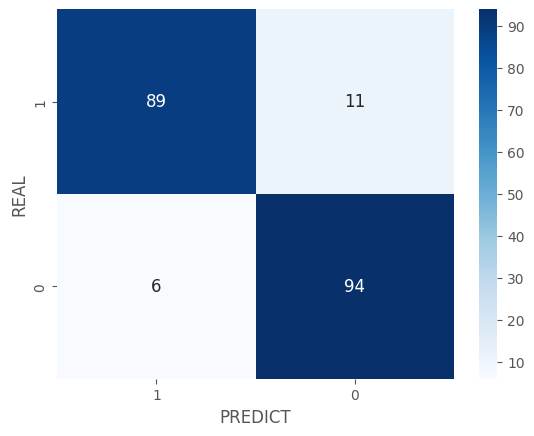

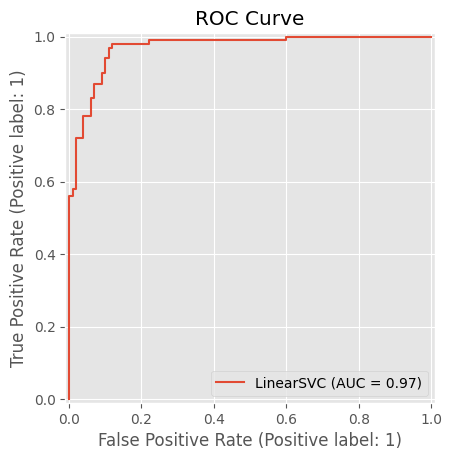

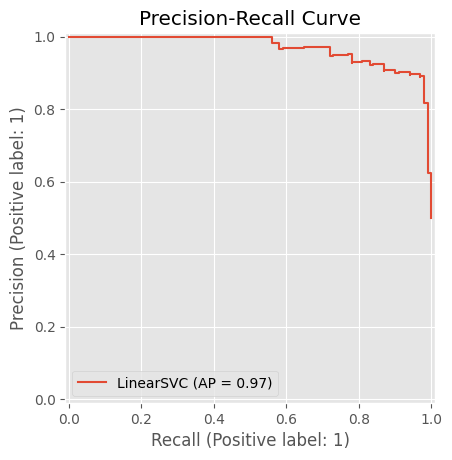

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.475
Precision: 0.476
Recall:    0.5
Fscore:    0.488




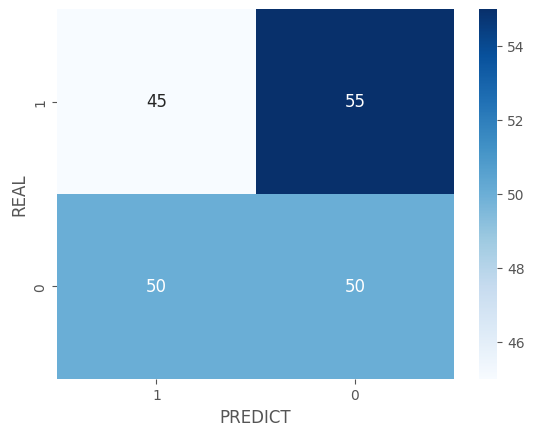

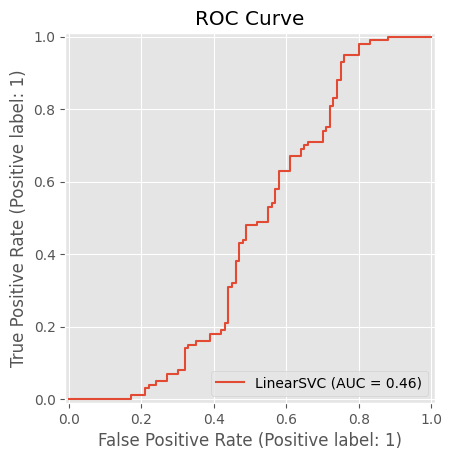

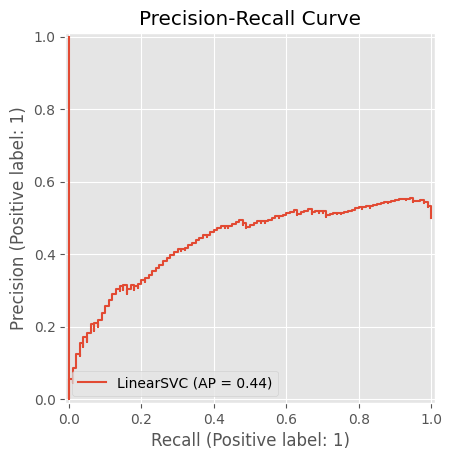

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.81
Precision: 0.798
Recall:    0.83
Fscore:    0.814




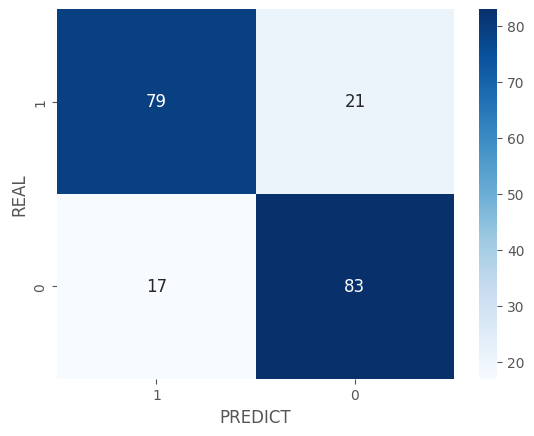

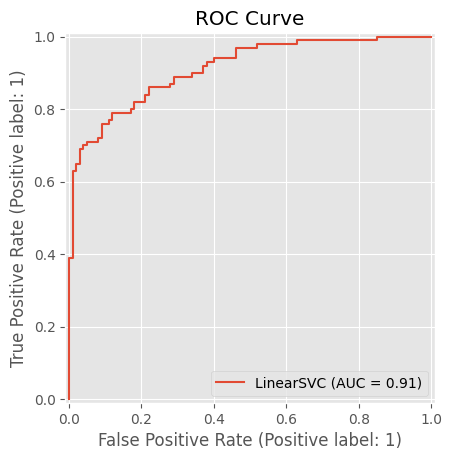

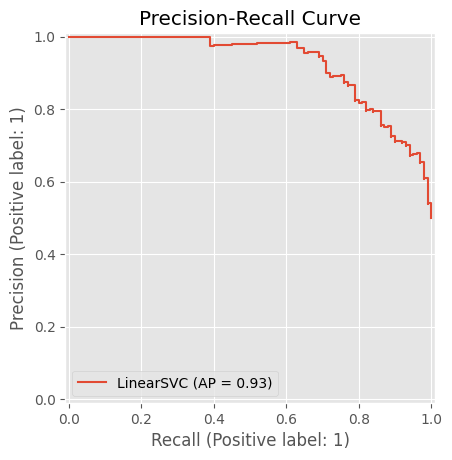

In [182]:
for lsvc, df_test,names in zip(LinearSVC_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Classification Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_lsvc'] = lsvc.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_lsvc'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_lsvc']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_lsvc']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_lsvc']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_lsvc']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(lsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(lsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

### Kernel radial
#### Entrenamiento y predicción

Ahora utilizaremos el kernel radial, cambiando el tipo de kernel al inicializar el clasificador. Inicializa el objeto SVC cambiando el kernel, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [191]:
svm_rbf = SVC(kernel='rbf')

In [193]:
svm_rbf.fit(df_train[['X1', 'X2']], df_train['y'])

SVC()

In [195]:
prediction = svm_rbf.predict(df_test[['X1', 'X2']])

#### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

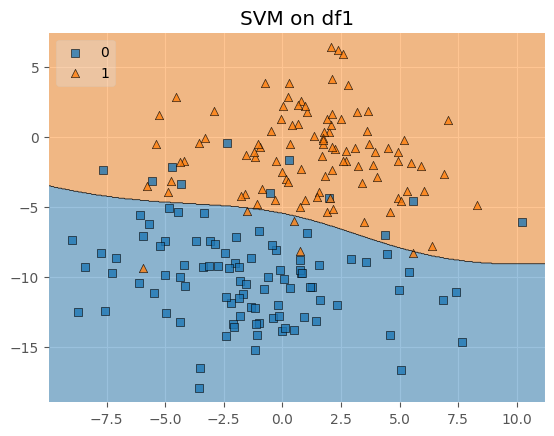

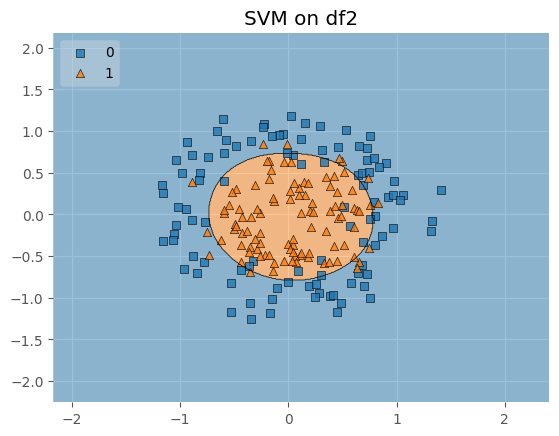

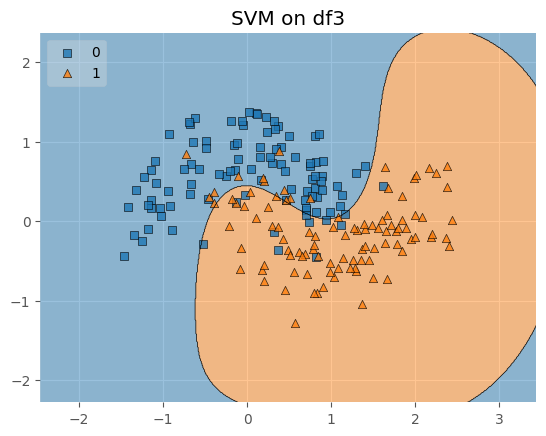

In [198]:
SVC_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = svm_rbf, legend=2)
    plt.title('SVM on '+names)
    plt.show()
    
    SVC_regs.append(svm_rbf)

############################################## 
Kernel radial for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.92
Precision: 0.896
Recall:    0.95
Fscore:    0.922




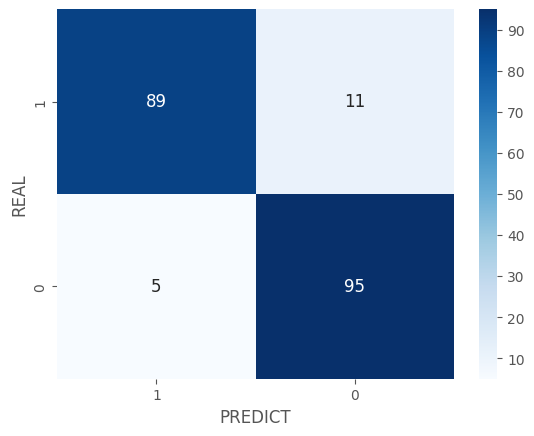

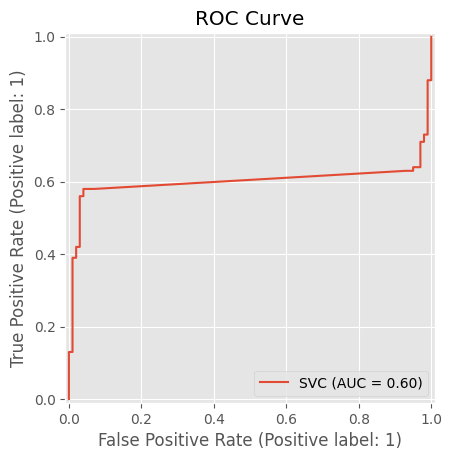

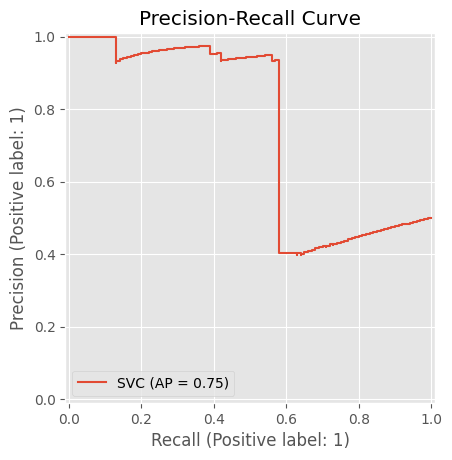

############################################## 
Kernel radial for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.865
Precision: 0.861
Recall:    0.87
Fscore:    0.866




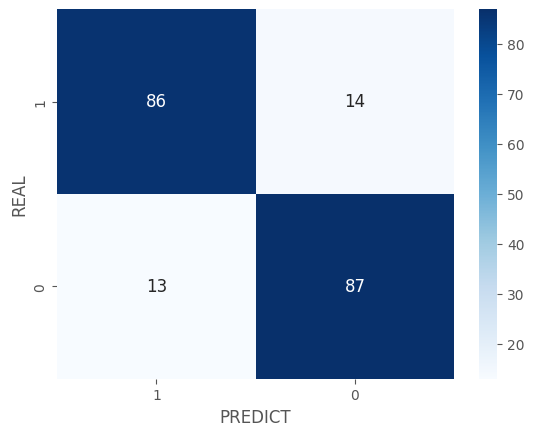

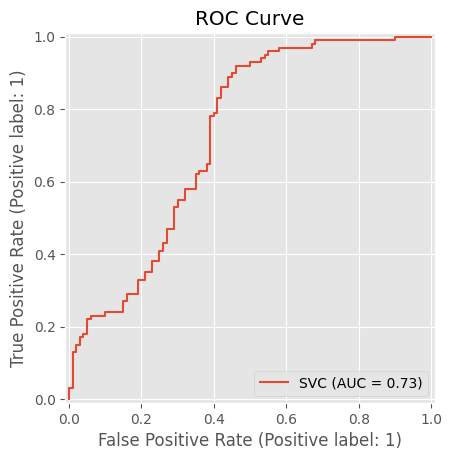

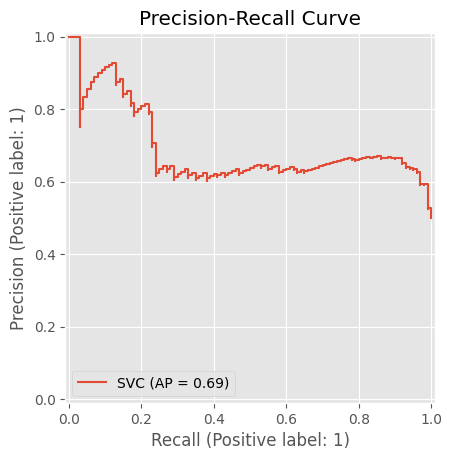

############################################## 
Kernel radial for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.87
Precision: 0.878
Recall:    0.86
Fscore:    0.869




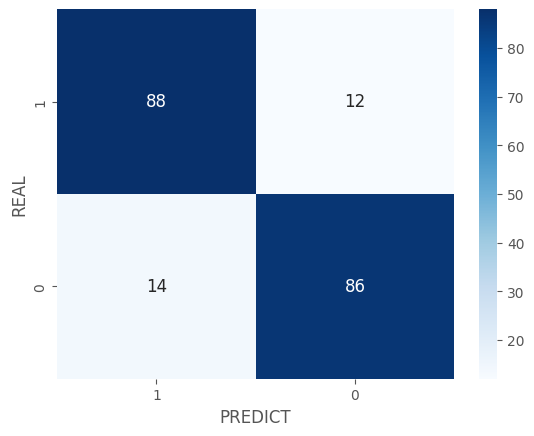

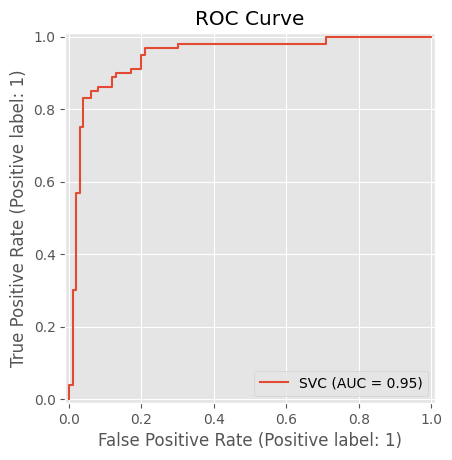

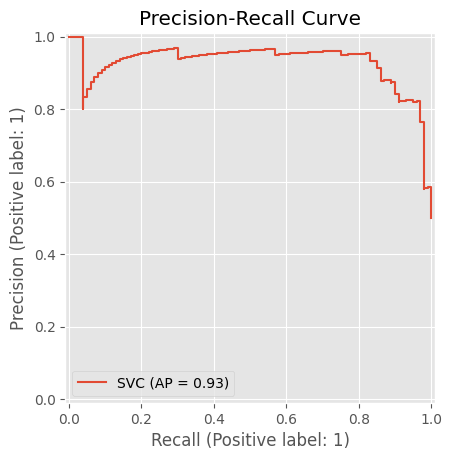

In [204]:
for svm_rbf, df_test,names in zip(SVC_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Kernel radial for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_rsvm'] = svm_rbf.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_rsvm'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_rsvm']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_rsvm']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_rsvm']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_rsvm']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(rsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(rsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

## Árbol de Decisión

### Entrenamiento y predicción

A continuación vamos a predecir nuestra clase con un Árbol de decisión. En este caso vamos a utilizar una profundidad del árbol igual a 5. Inicializa el objeto Decision Tree, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [240]:
tree= DecisionTreeClassifier() 

In [242]:
tree.fit(df_train[['X1', 'X2']], df_train['y']) 

DecisionTreeClassifier()

In [244]:
prediction = tree.predict(df_test[['X1', 'X2']])

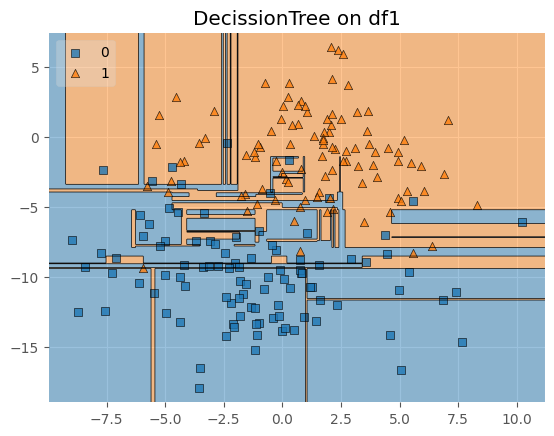

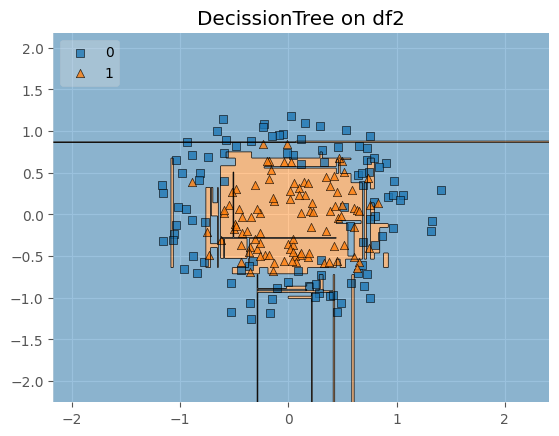

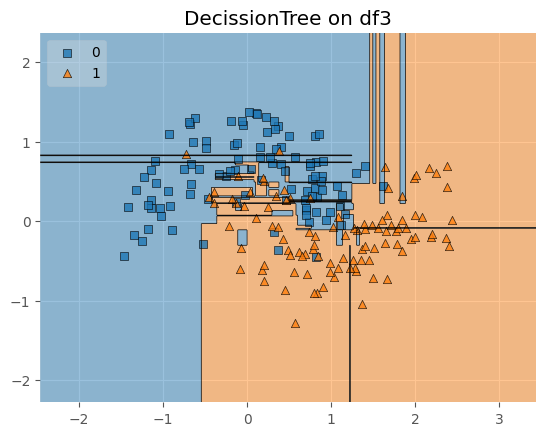

In [246]:
DecissionTree_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    tree = DecisionTreeClassifier() 
    tree.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = tree, legend=2)
    plt.title('DecissionTree on '+names)
    plt.show()
    
    DecissionTree_regs.append(tree)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
DecissionTree fordf1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.865
Precision: 0.848
Recall:    0.89
Fscore:    0.868




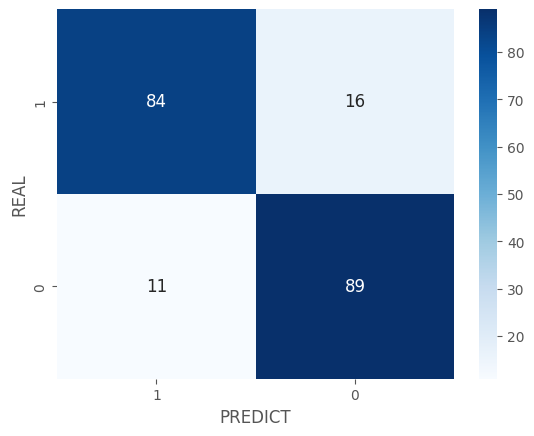

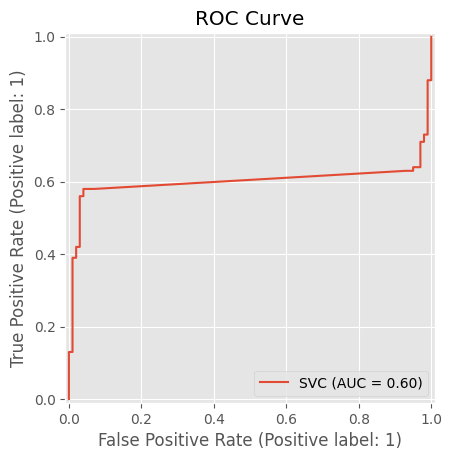

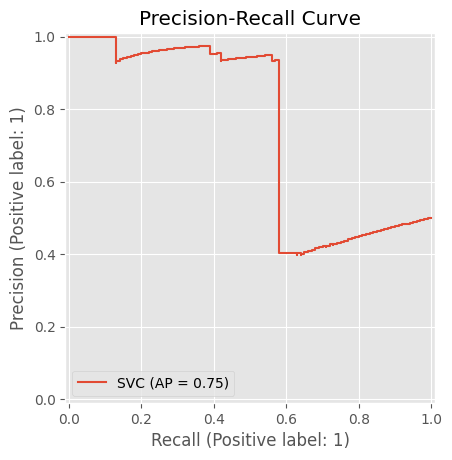

############################################## 
DecissionTree fordf2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.86
Precision: 0.86
Recall:    0.86
Fscore:    0.86




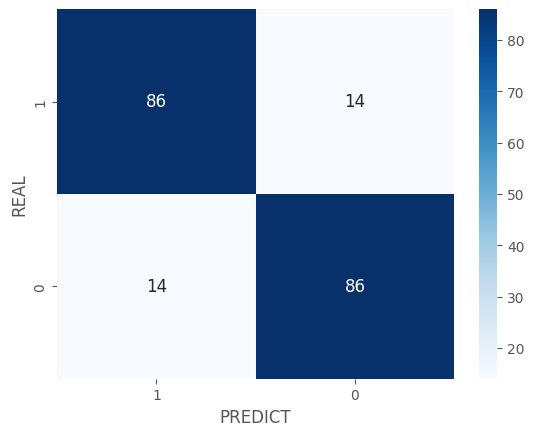

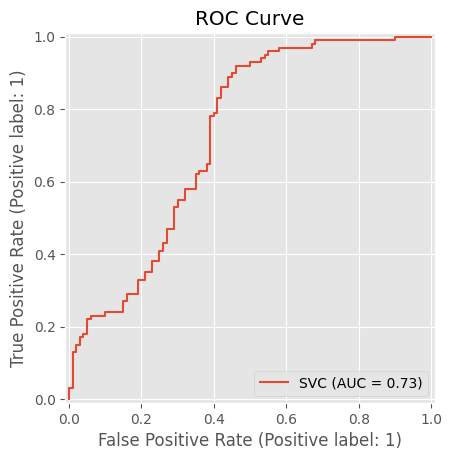

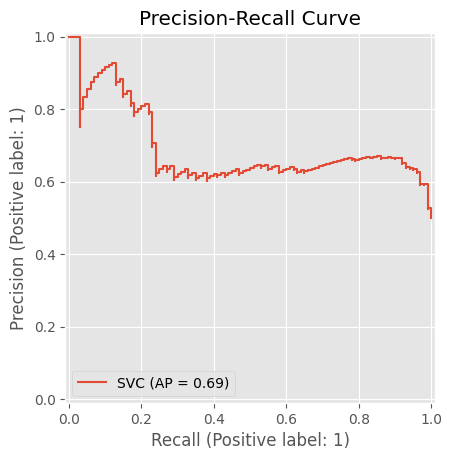

############################################## 
DecissionTree fordf3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.865
Precision: 0.869
Recall:    0.86
Fscore:    0.864




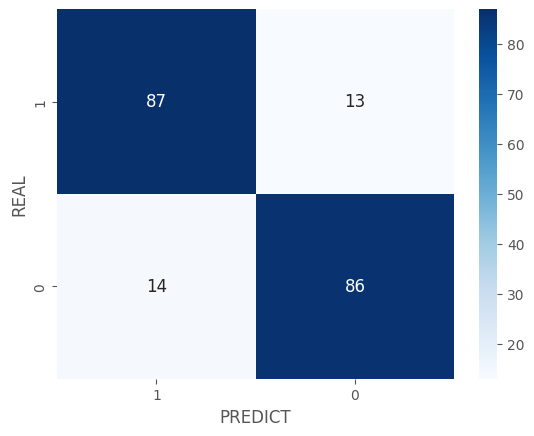

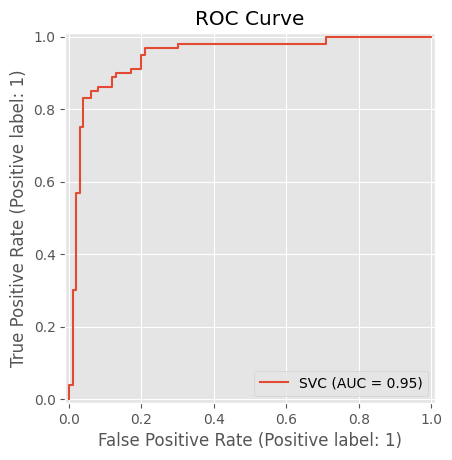

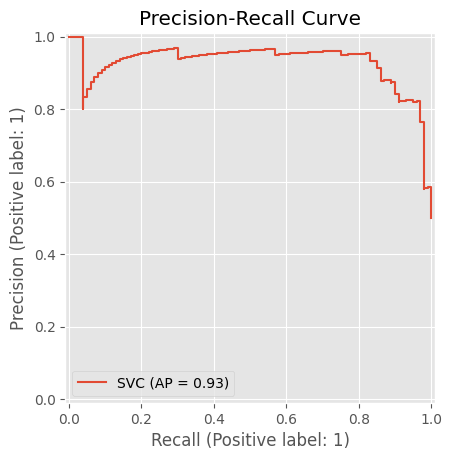

In [251]:
for tree, df_test,names in zip(DecissionTree_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('DecissionTree for'+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_tree'] = tree.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_tree'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_tree']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_tree']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_tree']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_tree']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(rsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(rsvc, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

## Modelos de ensemble: Random Forest

### Entrenamiento y predicción

En este caso vamos a usar modelos de ensemble, concreatamente Random Forest, ya que es uno de los algoritmos que suele dar mejor rendimiento. Inicializa el objeto Random Forest, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [269]:
rf.fit(df_train[['X1', 'X2']], df_train['y'])

RandomForestClassifier(random_state=42)

In [271]:
prediction = rf.predict(df_test[['X1', 'X2']])

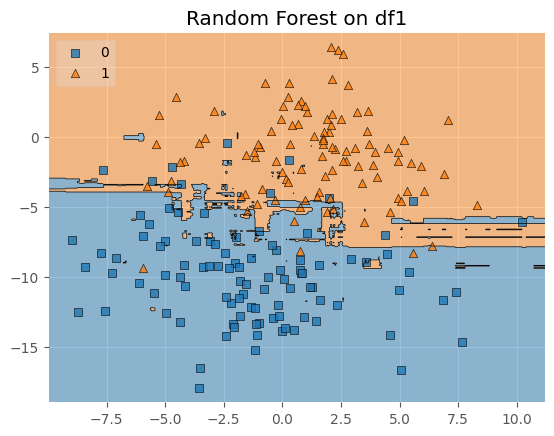

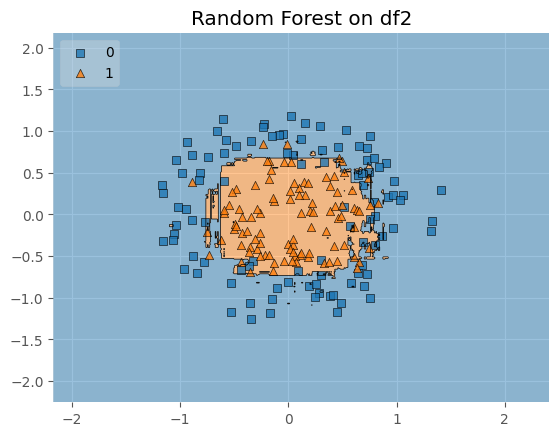

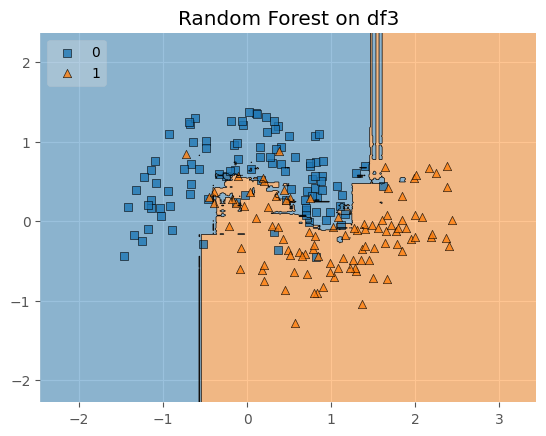

In [287]:
RandomForest_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = rf, legend=2)
    plt.title('Random Forest on '+names)
    plt.show()
    
    RandomForest_regs.append(rf)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Random Forest Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.91
Precision: 0.887
Recall:    0.94
Fscore:    0.913




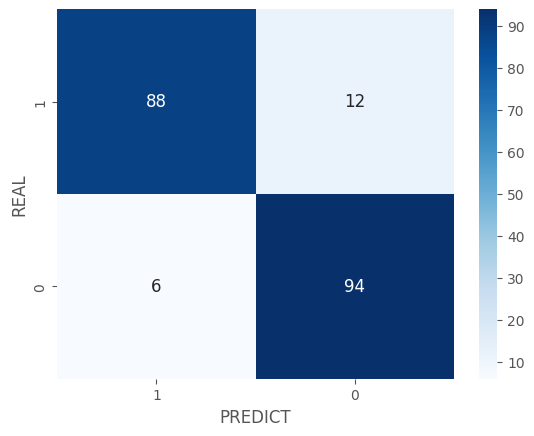

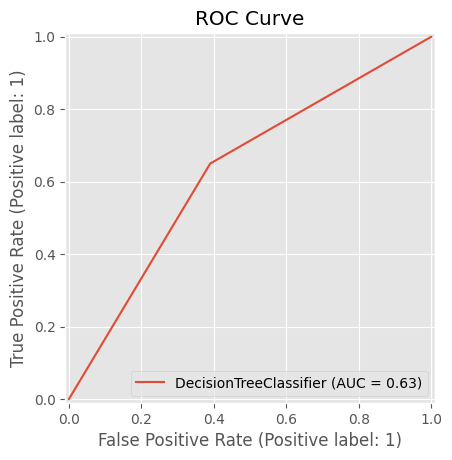

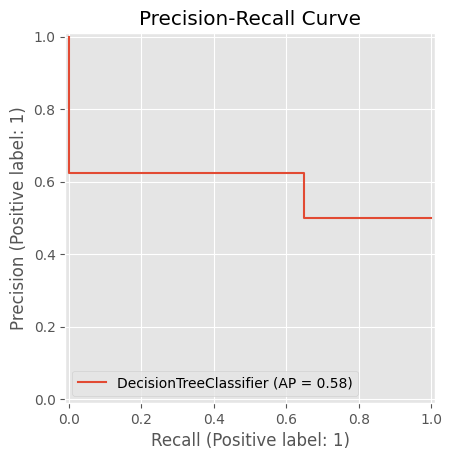

############################################## 
Random Forest Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.88
Precision: 0.88
Recall:    0.88
Fscore:    0.88




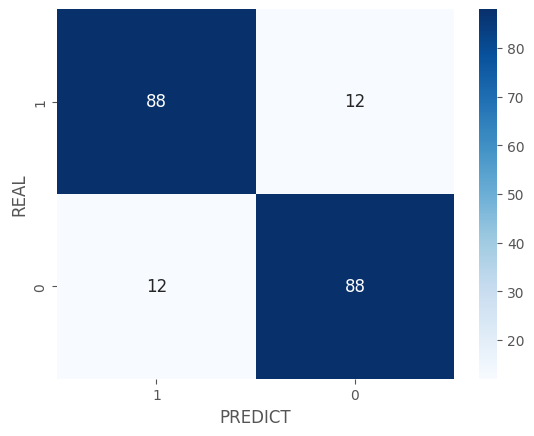

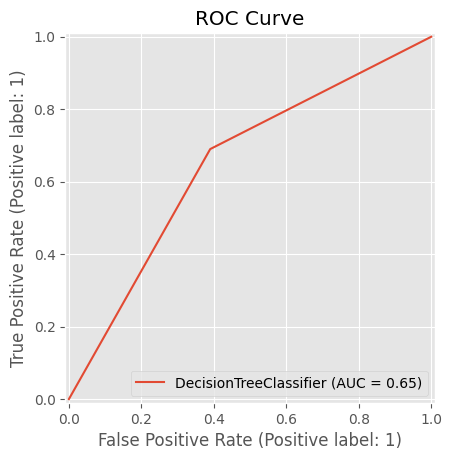

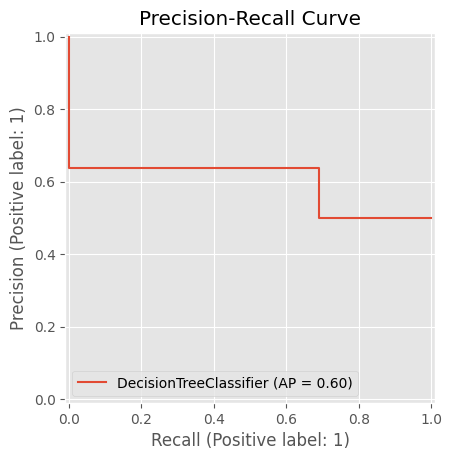

############################################## 
Random Forest Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.855
Precision: 0.851
Recall:    0.86
Fscore:    0.856




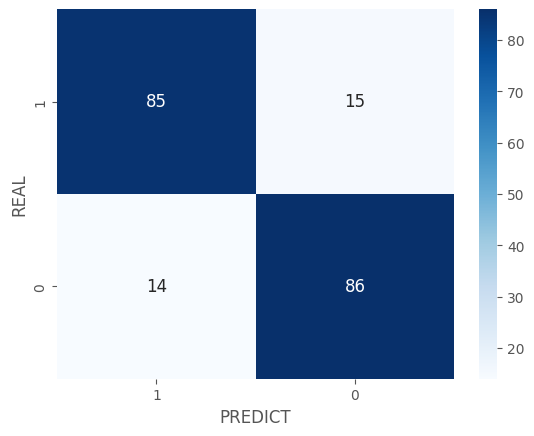

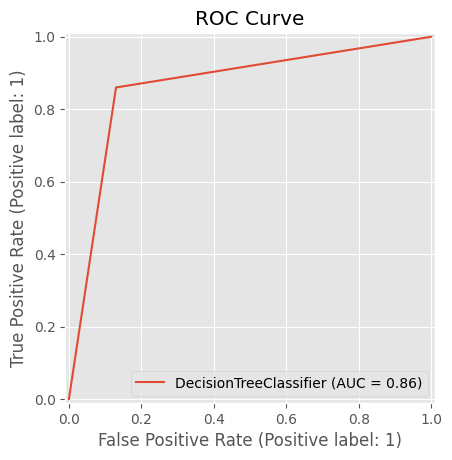

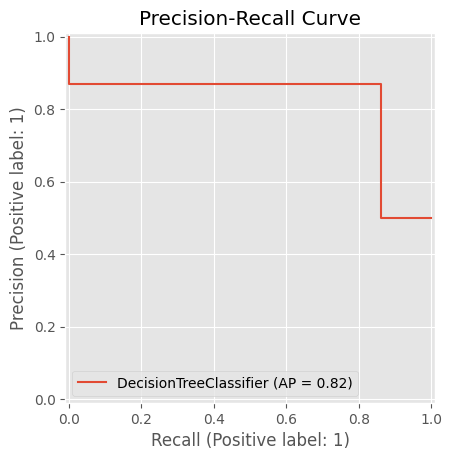

In [290]:
for rf, df_test,names in zip(RandomForest_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Random Forest Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_rf'] = rf.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_rf'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_rf']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_rf']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_rf']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_rf']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(tree, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(tree, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

## Modelos de boosting: Gradient Boosting

### Entrenamiento y predicción

En este caso vamos a usar modelos de boosting, concreatamente Gradint Boosting. Inicializa el objeto Gradient Boosting, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

In [217]:
from sklearn.ensemble import GradientBoostingClassifier

In [219]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [221]:
gb_model.fit(df_train[['X1', 'X2']], df_train['y'])

GradientBoostingClassifier(random_state=42)

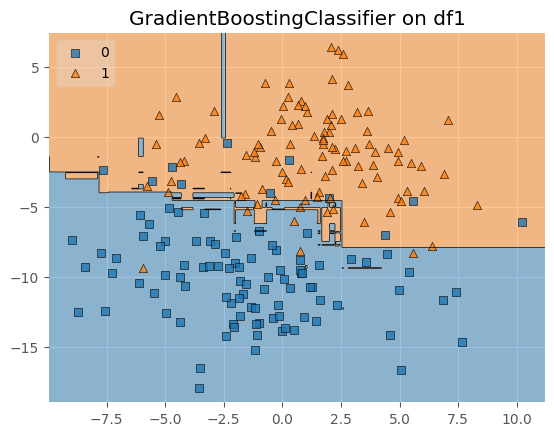

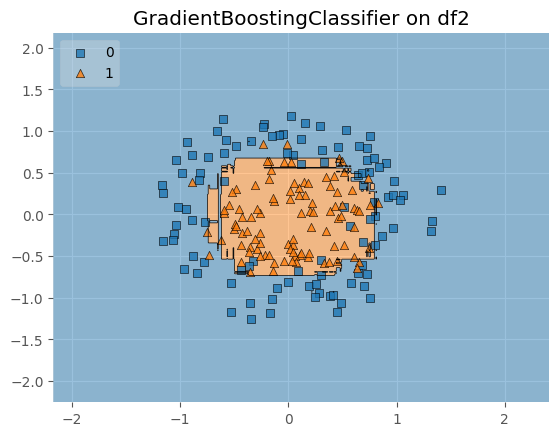

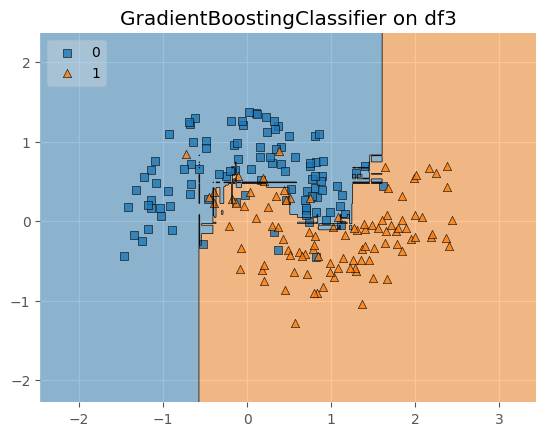

In [223]:
GradientBoosting_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = gb_model, legend=2)
    plt.title('GradientBoostingClassifier on '+names)
    plt.show()
    
    GradientBoosting_regs.append(gb_model)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
GradientBoostingClassifier Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.915
Precision: 0.895
Recall:    0.94
Fscore:    0.917




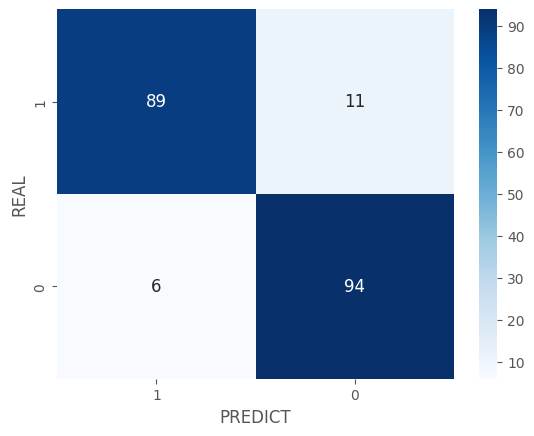

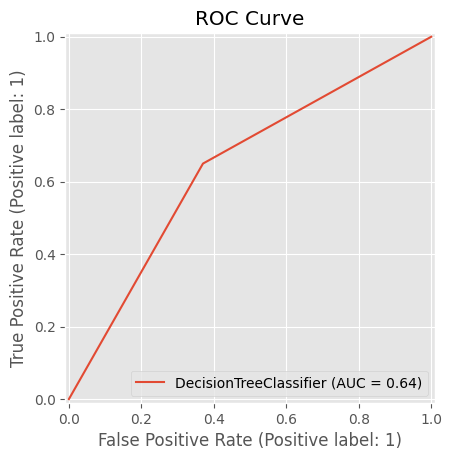

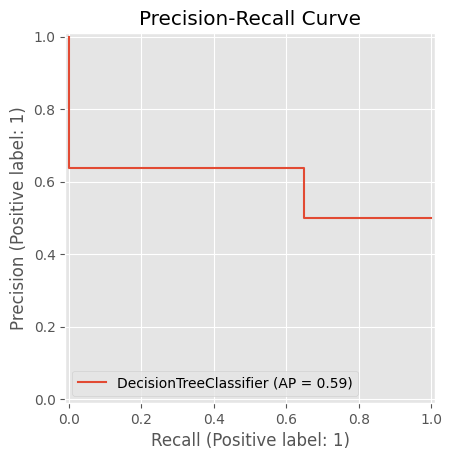

############################################## 
GradientBoostingClassifier Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.86
Precision: 0.853
Recall:    0.87
Fscore:    0.861




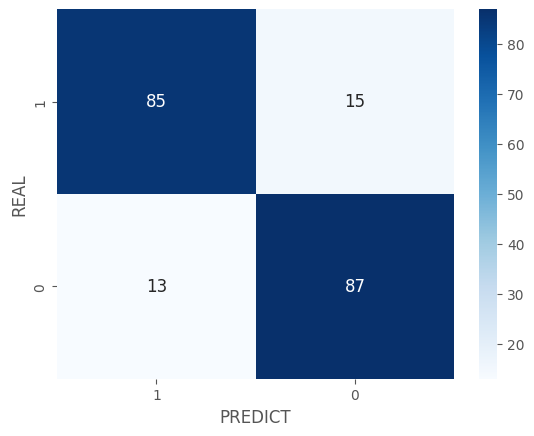

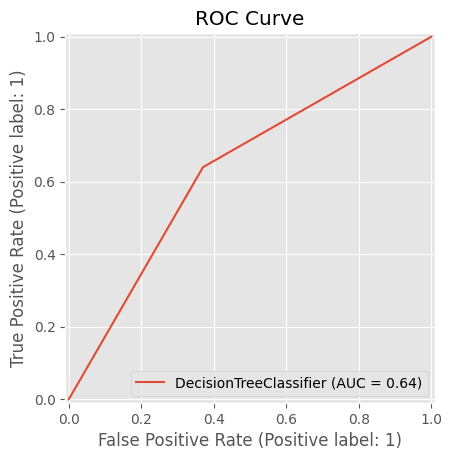

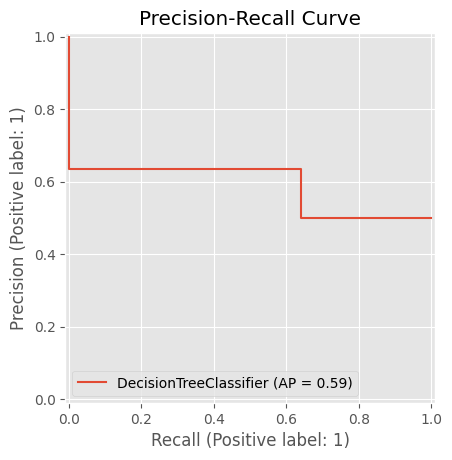

############################################## 
GradientBoostingClassifier Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.88
Precision: 0.888
Recall:    0.87
Fscore:    0.879




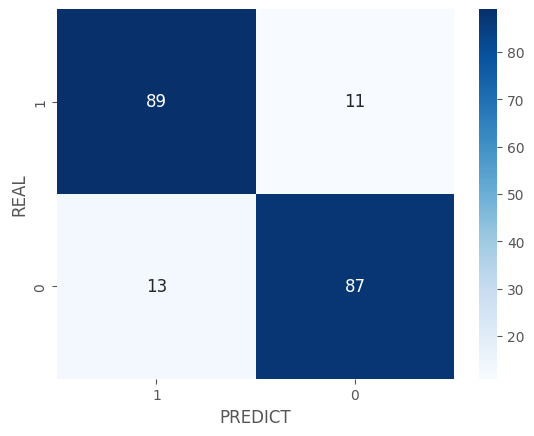

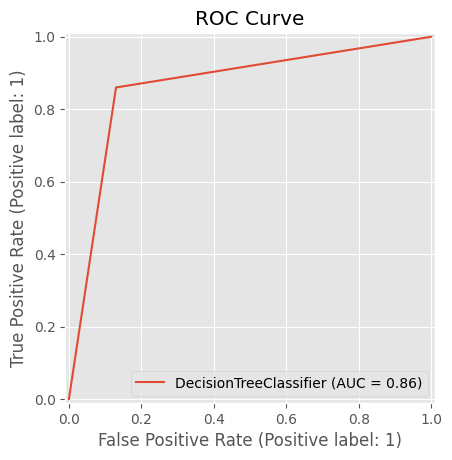

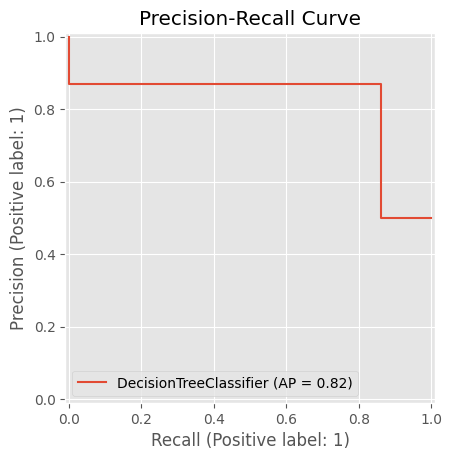

In [227]:
for gb_model, df_test,names in zip(GradientBoosting_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('GradientBoostingClassifier Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_gb'] = gb_model.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_gb'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_gb']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_gb']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_gb']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_gb']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(tree, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(tree, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()